# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, SimpleRNN, LSTM, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Let's import the dataset


In [0]:
def evaluation_tf(report, y_test, y_pred, classes):
  plt.plot(report.history['loss'], label = 'training_loss')
  plt.plot(report.history['val_loss'], label = 'validation_loss')
  plt.legend()
  plt.show()
  plt.plot(report.history['accuracy'], label = 'training_accuracy')
  plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
  plt.legend()
  plt.show()

  from sklearn.metrics import confusion_matrix
  import itertools
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(10,10))
  plt.imshow(cm, cmap=plt.cm.Blues)
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], 'd'),
            horizontalalignment = 'center',
            color='black')
  plt.xlabel("Predicted labels")
  plt.ylabel("True labels")
  plt.xticks(range(0,classes))
  plt.yticks(range(0,classes))
  plt.title('Confusion matrix')
  plt.colorbar()
  plt.show()

In [11]:
data = pd.read_csv("sample_data/train.tsv", delimiter='\t')
data.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [12]:
Y = len(data.Sentiment.unique())
print(Y)

5


In [0]:
X = data.iloc[:, 2]
y = data.iloc[:, -1].values

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
MAX_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)


In [16]:
word2index = tokenizer.word_index
V = len(word2index)
print("tokens = " + str(V))

tokens = 15280


In [0]:
X_train = pad_sequences(sequences_train)

In [0]:
X_test = pad_sequences(sequences_test, maxlen=X_train.shape[1])

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

N, T = X_train.shape

(124848, 49)
(31212, 49)
(124848,)
(31212,)


In [0]:
# Let's talk about D, what is it and how do we set it? 
# This is the dimensionality of the embedding layer, essentially the vector that each word becomes 

D = 30 
# hidden units
U = 20


In [0]:
i_layer = Input(shape = (T,))
h_layer = Embedding(V+1, D)(i_layer)
# V+1 because https://github.com/tensorflow/tensorflow/issues/38619
h_layer = Dense(U, activation='relu')(h_layer)
h_layer = Dense(U, activation='relu')(h_layer)
h_layer = GlobalMaxPooling1D()(h_layer)
o_layer = Dense(Y, activation='softmax')(h_layer)

model = Model(i_layer, o_layer)

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [26]:
report = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
3902/3902 [==============================] - 27s 7ms/step - loss: 1.0084 - accuracy: 0.5930 - val_loss: 0.8995 - val_accuracy: 0.6316
Epoch 2/20
3902/3902 [==============================] - 27s 7ms/step - loss: 0.8134 - accuracy: 0.6631 - val_loss: 0.8638 - val_accuracy: 0.6469
Epoch 3/20
3902/3902 [==============================] - 27s 7ms/step - loss: 0.7454 - accuracy: 0.6884 - val_loss: 0.8594 - val_accuracy: 0.6511
Epoch 4/20
3902/3902 [==============================] - 28s 7ms/step - loss: 0.7008 - accuracy: 0.7063 - val_loss: 0.8636 - val_accuracy: 0.6561
Epoch 5/20
3902/3902 [==============================] - 27s 7ms/step - loss: 0.6675 - accuracy: 0.7198 - val_loss: 0.8720 - val_accuracy: 0.6568
Epoch 6/20
3902/3902 [==============================] - 27s 7ms/step - loss: 0.6401 - accuracy: 0.7307 - val_loss: 0.8733 - val_accuracy: 0.6556
Epoch 7/20
3902/3902 [==============================] - 27s 7ms/step - loss: 0.6179 - accuracy: 0.7409 - val_loss: 0.8839 - val_ac

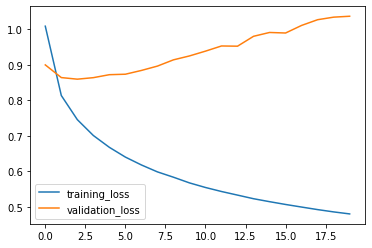

In [27]:
plt.plot(report.history['loss'], label='training_loss')
plt.plot(report.history['val_loss'], label='validation_loss')
plt.legend()

## Seems like the model is overfitting, let's tune it

In [0]:
# Let's talk about D, what is it and how do we set it? 
# This is the dimensionality of the embedding layer, essentially the vector that each word becomes 

D = 20 
# hidden units
U = 20


In [0]:
i_layer = Input(shape = (T,))
h_layer = Embedding(V+1, D)(i_layer)
# V+1 because https://github.com/tensorflow/tensorflow/issues/38619
h_layer = Dense(U, activation='relu')(h_layer)
h_layer = Dropout(0.5)(h_layer)
h_layer = Dense(U, activation='relu')(h_layer)
h_layer = Dropout(0.5)(h_layer)
h_layer = GlobalMaxPooling1D()(h_layer)
o_layer = Dense(Y, activation='softmax')(h_layer)

model = Model(i_layer, o_layer)

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [36]:
report = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
3902/3902 [==============================] - 25s 6ms/step - loss: 1.1755 - accuracy: 0.5370 - val_loss: 1.3402 - val_accuracy: 0.4976
Epoch 2/20
3902/3902 [==============================] - 25s 6ms/step - loss: 1.0247 - accuracy: 0.5891 - val_loss: 1.2539 - val_accuracy: 0.5434
Epoch 3/20
3902/3902 [==============================] - 25s 6ms/step - loss: 0.9804 - accuracy: 0.6039 - val_loss: 1.1903 - val_accuracy: 0.5766
Epoch 4/20
3902/3902 [==============================] - 25s 6ms/step - loss: 0.9521 - accuracy: 0.6134 - val_loss: 1.1714 - val_accuracy: 0.5813
Epoch 5/20
3902/3902 [==============================] - 25s 6ms/step - loss: 0.9383 - accuracy: 0.6195 - val_loss: 1.1533 - val_accuracy: 0.5883
Epoch 6/20
3902/3902 [==============================] - 25s 6ms/step - loss: 0.9283 - accuracy: 0.6236 - val_loss: 1.1263 - val_accuracy: 0.5969
Epoch 7/20
3902/3902 [==============================] - 25s 6ms/step - loss: 0.9200 - accuracy: 0.6240 - val_loss: 1.1375 - val_ac

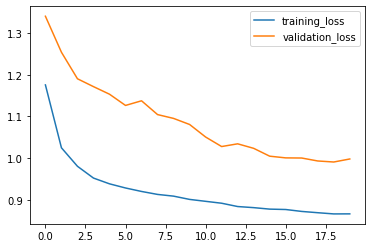

In [37]:
plt.plot(report.history['loss'], label='training_loss')
plt.plot(report.history['val_loss'], label='validation_loss')
plt.legend()

In [0]:
y_pred= model.predict(X_test).argmax(axis = 1)

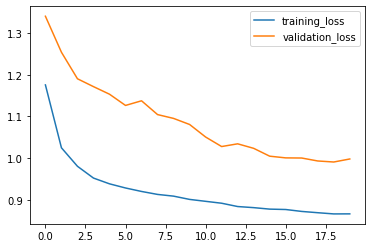

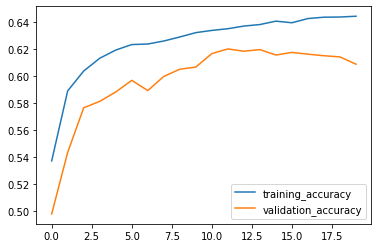

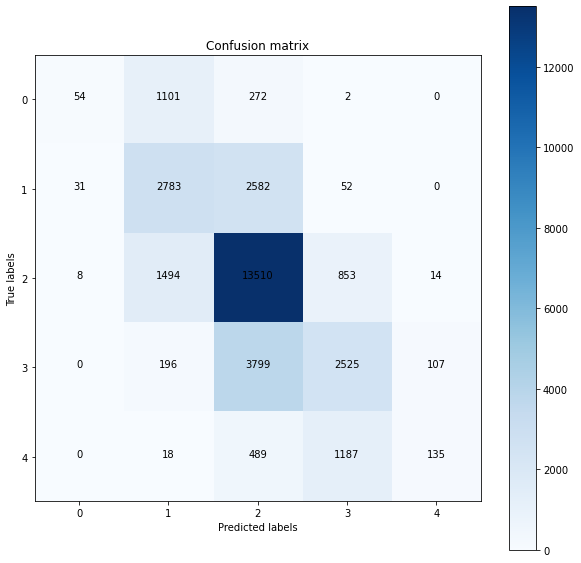

In [40]:
evaluation_tf(report, y_test, y_pred, Y)